In [1]:
import os
from PIL import Image
import torch

from diffusion.controlnet import ControlNetModel
from diffusion.pipeline_controlnet import StableDiffusionControlNetPipeline
from diffusers import UniPCMultistepScheduler
from diffusers.utils import load_image

device = "cuda:0"

/root/miniconda3/envs/hw3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Set model paths

In [6]:
base_model_path = "runwayml/stable-diffusion-v1-5"      # NOTE: set as the base Stable Diffusion model
controlnet_path = "./runs/controlnet_fill50k_1"           # NOTE: set as the output directory of your ControlNet training

### Load models and scheduler

In [7]:
# Load ControlNet
controlnet = ControlNetModel.from_pretrained(
    controlnet_path, 
    torch_dtype=torch.float16
)
# Load Stable Diffusion with ControlNet
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, 
    controlnet=controlnet, 
    torch_dtype=torch.float16,
    safety_checker=None,
)
# Set scheduler
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# Load model to GPU
pipe.to(device)

Loading pipeline components...: 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]
You have disabled the safety checker for <class 'diffusion.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


StableDiffusionControlNetPipeline {
  "_class_name": "StableDiffusionControlNetPipeline",
  "_diffusers_version": "0.28.0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "controlnet": [
    "diffusion.controlnet",
    "ControlNetModel"
  ],
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "UniPCMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

### Load condition for ControlNet

Prompt: pale golden rod circle with old lace background


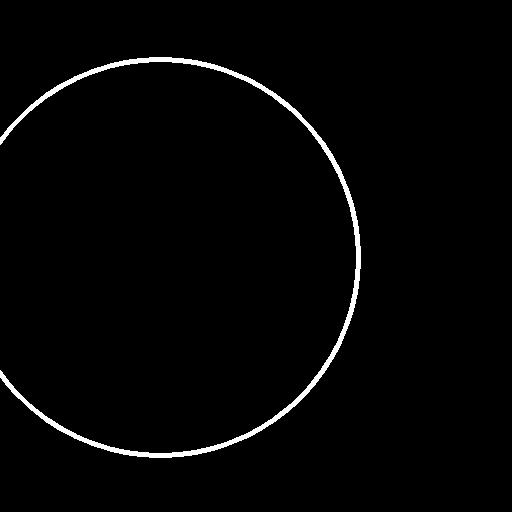

In [8]:
control_image = load_image("./data/conditioning_image_1.png")
prompt = "pale golden rod circle with old lace background"

print(f"Prompt: {prompt}")
control_image

In [24]:
import json

data_path = "./data/test_conditions"

with open("./data/test_prompts.json") as json_file:
    test_prompts = json.load(json_file)
    

pale golden rod circle with old lace background


100%|██████████| 20/20 [00:07<00:00,  2.68it/s]


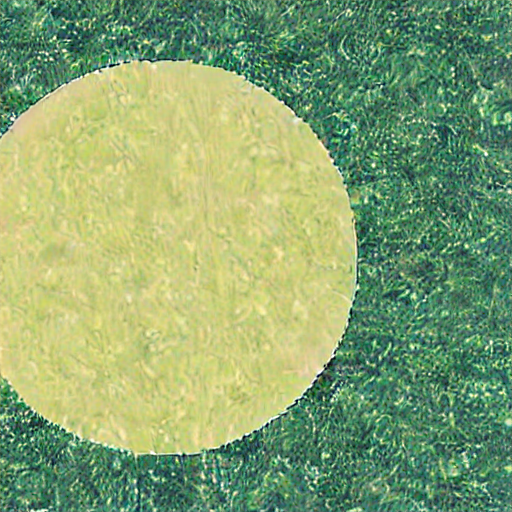

In [35]:
seed = 8
generator = torch.manual_seed(seed)

prompt = test_prompts['0']
path = f"{data_path}/0.png"
control_image = load_image(path)

print(prompt)
# Generate image
image = pipe(
    prompt, 
    num_inference_steps=20, 
    generator=generator, 
    image=control_image
).images[0]

image.save(f"./results/{prompt}.png")
image

sea green circle with a light cyan background


  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:07<00:00,  2.69it/s]


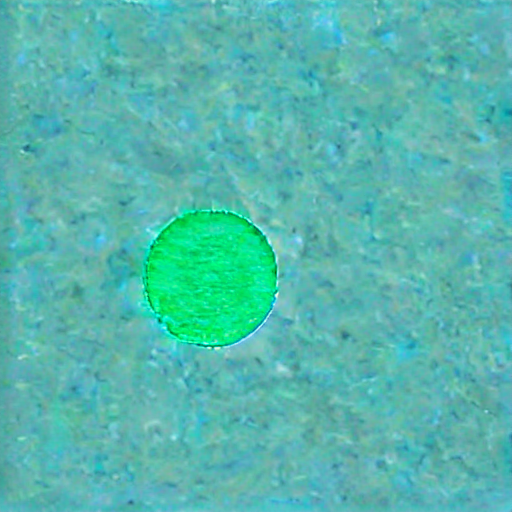

In [36]:
seed = 3
generator = torch.manual_seed(seed)

prompt = test_prompts['1']
path = f"{data_path}/1.png"
control_image = load_image(path)

print(prompt)
# Generate image
image = pipe(
    prompt, 
    num_inference_steps=20, 
    generator=generator, 
    image=control_image
).images[0]

image.save(f"./results/{prompt}.png")
image

deep sky blue circle with a light yellow background


100%|██████████| 20/20 [00:07<00:00,  2.72it/s]


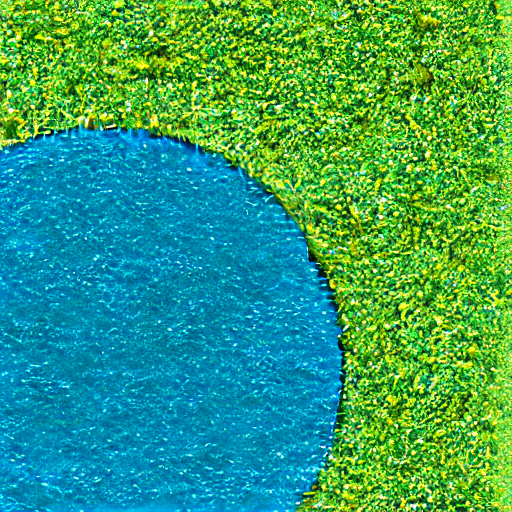

In [87]:
seed = 180
generator = torch.manual_seed(seed)

prompt = test_prompts['2']
path = f"{data_path}/2.jpg"
control_image = load_image(path)

print(prompt)
# Generate image
image = pipe(
    prompt, 
    num_inference_steps=20, 
    generator=generator, 
    image=control_image
).images[0]

image.save(f"./results/{prompt}.png")
image

rosy brown circle with a misty rose background


100%|██████████| 20/20 [00:07<00:00,  2.56it/s]


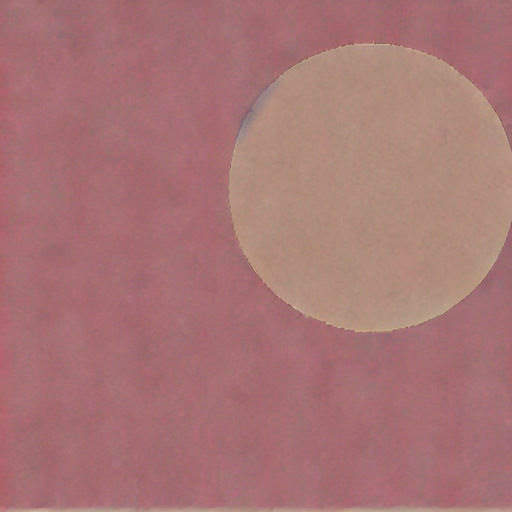

In [63]:
seed = 8
generator = torch.manual_seed(seed)

prompt = test_prompts['3']
path = f"{data_path}/3.jpg"
control_image = load_image(path)

print(prompt)
# Generate image
image = pipe(
    prompt, 
    num_inference_steps=20, 
    generator=generator, 
    image=control_image
).images[0]

image.save(f"./results/{prompt}.png")
image

forest green circle with an antique brown background


100%|██████████| 20/20 [00:07<00:00,  2.66it/s]


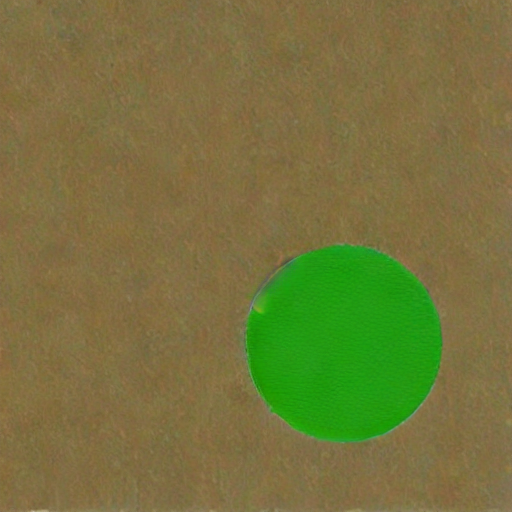

In [64]:
seed = 8
generator = torch.manual_seed(seed)

prompt = test_prompts['4']
path = f"{data_path}/4.jpg"
control_image = load_image(path)

print(prompt)
# Generate image
image = pipe(
    prompt, 
    num_inference_steps=20, 
    generator=generator, 
    image=control_image
).images[0]

image.save(f"./results/{prompt}.png")
image